In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

In [73]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [75]:
df.duplicated('CustomerId').sum()

0

In [76]:
df= df.set_index('CustomerId')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [78]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [79]:
df.replace({'Geography':{'France':2, 'Germany':1, 'Spain':0}}, inplace=True)

<ipython-input-79-d23879c1c306>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography':{'France':2, 'Germany':1, 'Spain':0}}, inplace=True)


In [80]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [81]:
df.replace({'Gender':{'Male':0, 'Female':1}}, inplace=True)

<ipython-input-81-1bfcf9037084>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':0, 'Female':1}}, inplace=True)


In [82]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [83]:
df.replace({'Num Of Products':{ 1:0, 2:1, 3:1, 4:1 }}, inplace=True)

In [84]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [85]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [86]:
df.loc[(df['Balance']==0), 'Churn'].value_counts

<bound method IndexOpsMixin.value_counts of CustomerId
15634602    1
15701354    0
15592531    0
15737173    0
15632264    0
           ..
15605622    0
15657105    0
15719294    0
15606229    0
15584532    1
Name: Churn, Length: 3617, dtype: int64>

In [87]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

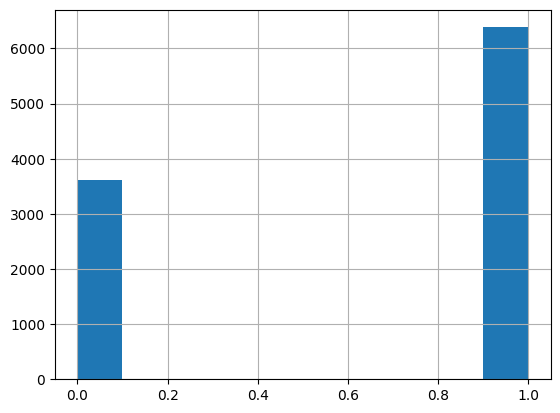

In [88]:
df['Zero Balance'].hist()

In [89]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [90]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [91]:
X = df.drop(['Surname','Churn'], axis = 1)

In [92]:
Y = df['Churn']

In [93]:
X.shape,Y.shape

((10000, 11), (10000,))

In [94]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


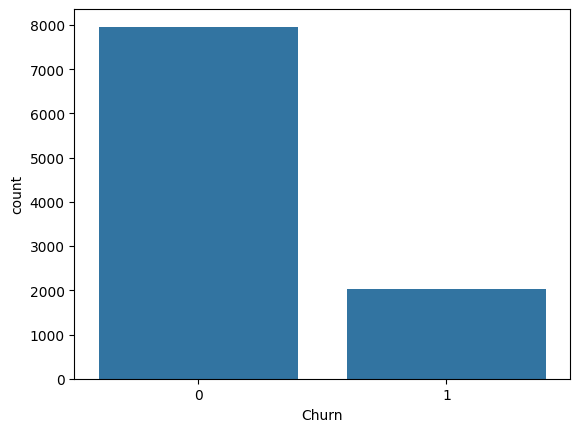

In [95]:
sns.countplot(x ='Churn',data = df);

In [96]:
X.shape,Y.shape

((10000, 11), (10000,))

In [97]:
Y.value_counts()

,count
Churn,
0,7963
1,2037


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
sc = StandardScaler()

In [102]:
# prompt: Standardize Original Data

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [103]:
# prompt: Standardize Random under Sample Data

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, Y_train)

# Standardize the resampled data
sc_rus = StandardScaler()
X_rus = sc_rus.fit_transform(X_rus)


In [104]:
# prompt: Standardize Random over Sample Data

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, Y_train)

# Standardize the resampled data
sc_ros = StandardScaler()
X_ros = sc_ros.fit_transform(X_ros)


In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
model = LogisticRegression()

In [107]:
model.fit(X_train, Y_train)


LogisticRegression()

In [108]:
Y_pred = model.predict(X_test)

In [109]:
Y_pred = model.predict(X_test)

In [110]:
confusion_matrix(Y_test, Y_pred)

array([[2334,   85],
       [ 455,  126]])

In [111]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2419
           1       0.60      0.22      0.32       581

    accuracy                           0.82      3000
   macro avg       0.72      0.59      0.61      3000
weighted avg       0.79      0.82      0.78      3000



In [112]:
from sklearn.svm import SVC # import the SVC class from sklearn.svm

In [113]:
param_grid = {'C':[0.1,1,10],'gamma':[0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [114]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=10, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=10, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END C=10, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [115]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.1)


In [116]:
grid_predictions = grid.predict(X_test)

In [117]:
confusion_matrix(Y_test,grid_predictions)

array([[1876,  543],
       [ 182,  399]])

In [118]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2419
           1       0.42      0.69      0.52       581

    accuracy                           0.76      3000
   macro avg       0.67      0.73      0.68      3000
weighted avg       0.82      0.76      0.78      3000

